In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
dataset = pd.read_excel("/Users/rishavdas/Downloads/Data/HR_Employee_Attrition-1.xlsx")
dataset.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         1            80   
1              1  ...                         4            80   
2              1  ...                         2            80   
3              1  ...                         3            80   
4              1  ...                         4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [3]:
dataset.shape

(2940, 35)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
for i in dataset.select_dtypes('object').columns:
    dataset[i] = dataset[i].astype('category')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            2940 non-null   int64   
 1   Attrition                 2940 non-null   category
 2   Age                       2940 non-null   int64   
 3   BusinessTravel            2940 non-null   category
 4   DailyRate                 2940 non-null   int64   
 5   Department                2940 non-null   category
 6   DistanceFromHome          2940 non-null   int64   
 7   Education                 2940 non-null   int64   
 8   EducationField            2940 non-null   category
 9   EmployeeCount             2940 non-null   int64   
 10  EnvironmentSatisfaction   2940 non-null   int64   
 11  Gender                    2940 non-null   category
 12  HourlyRate                2940 non-null   int64   
 13  JobInvolvement            2940 non-null   int64 

In [7]:
def continuos_univariate_analysis(data,
                                  feature,
                                  figsize=(12, 8),
                                  kde=False,
                                  bins=None):
    f1, (ax_box,
         ax_hist) = plt.subplots(nrows=2,
                                 sharex=True,
                                 gridspec_kw={'height_ratios': (0.25, 0.75)},
                                 figsize=figsize)
    sns.color_palette("viridis", as_cmap=True)
    sns.boxplot(data=data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='yellow')
    sns.histplot(data=data,
                 x=feature,
                 ax=ax_hist,
                 showmeans=True,
                 color='crest',
                 bins=bins,
                 kde=kde) if bins else sns.histplot(
                     data=data, x=feature, ax=ax_hist, kde=kde, color='blue')
    ax_hist.axvline(data[feature].mean(), color='cyan', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='orange', linestyle="-")

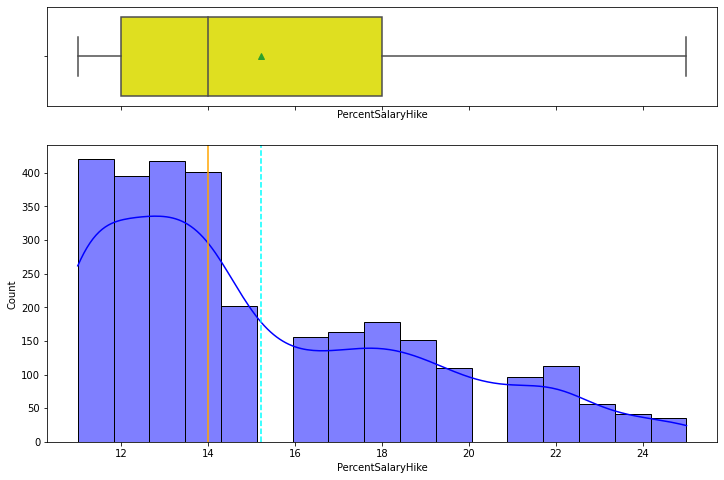

In [8]:
continuos_univariate_analysis(dataset, 'PercentSalaryHike', kde=True)

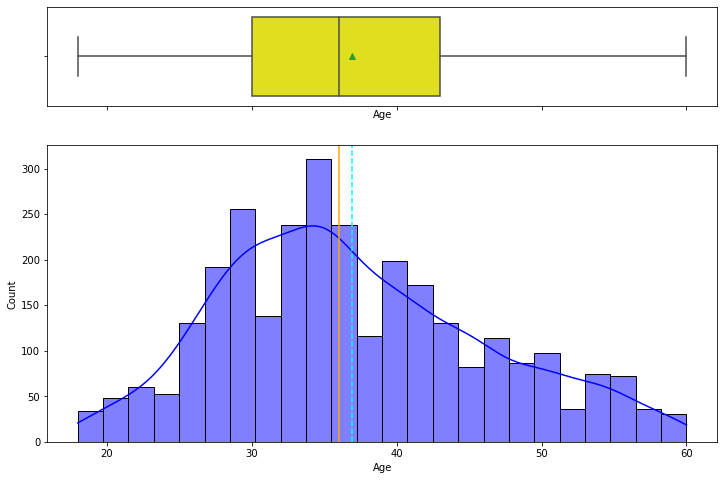

In [9]:
continuos_univariate_analysis(dataset, 'Age', kde=True)

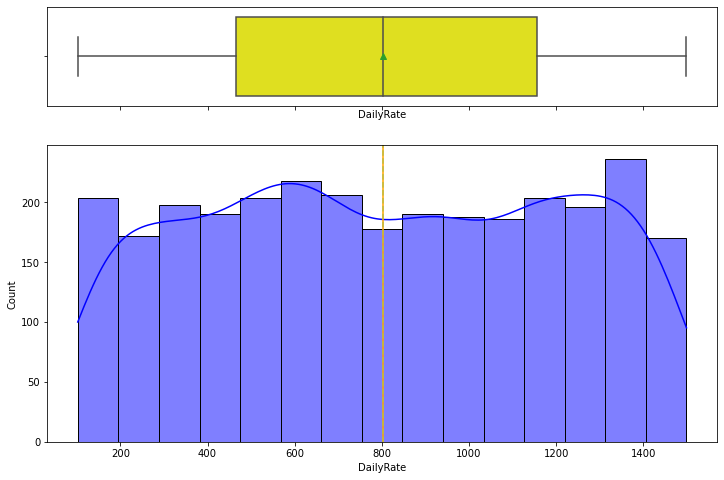

In [10]:
continuos_univariate_analysis(dataset, 'DailyRate', kde=True)

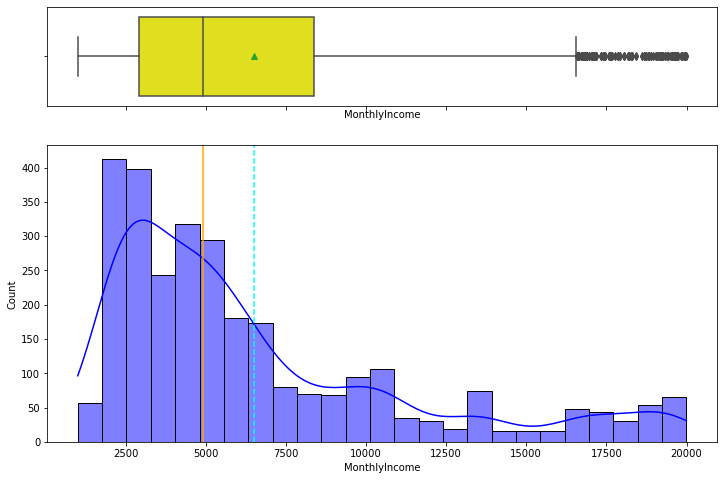

In [9]:
continuos_univariate_analysis(dataset, 'MonthlyIncome', kde=True)

In [11]:
dataset[dataset['MonthlyIncome'] > 16000].groupby(['JobRole']).agg({'MonthlyIncome':'mean'})

MonthlyIncome
JobRole                                 
Healthcare Representative            NaN
Human Resources                      NaN
Laboratory Technician                NaN
Manager                     18155.567901
Manufacturing Director               NaN
Research Director           18269.622222
Research Scientist                   NaN
Sales Executive                      NaN
Sales Representative                 NaN

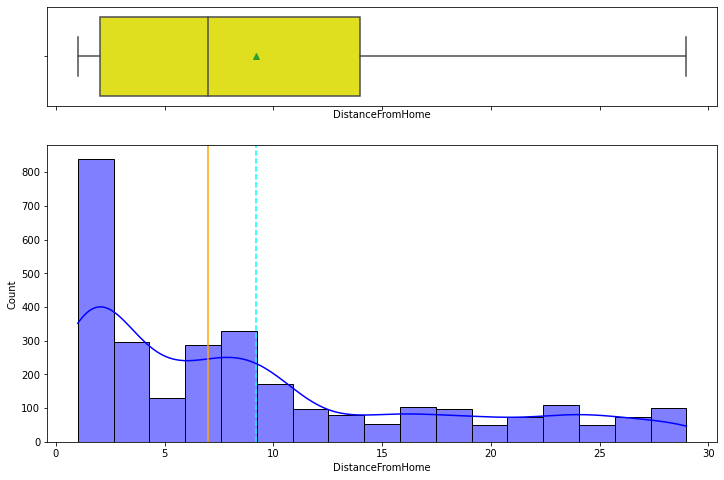

In [12]:
continuos_univariate_analysis(dataset, 'DistanceFromHome', kde=True)

In [9]:
dataset.groupby(['Attrition'])['PercentSalaryHike'].mean()

Attrition
No     15.231144
Yes    15.097046
Name: PercentSalaryHike, dtype: float64

In [13]:
bins = [10, 15, 20, 25]
hike_cat = ['AVGHIKE', 'MEDHIKE', 'HIGHHIKE']
dataset['hike_cat'] = pd.cut(dataset['PercentSalaryHike'], bins=bins, labels=hike_cat, include_lowest = True)

In [14]:
dataset.groupby(['Attrition', 'hike_cat']).agg({'EmployeeNumber':'count', 'MonthlyIncome':'mean'}).reset_index().pivot_table(index='hike_cat', columns='Attrition', values='EmployeeNumber')

Attrition    No  Yes
hike_cat            
AVGHIKE    1538  300
MEDHIKE     646  114
HIGHHIKE    282   60

## Observation:
1. Higher Hike will reduce the Attrition rate given  Monthly income is lesser than Avg 


## Univariate Discrete Analysis

In [13]:
def discrete_univariate_analysis(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="flare",
        order=data[feature].value_counts().index[:n].sort_values(
            ascending=False))
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label, (x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points")
    plt.show()

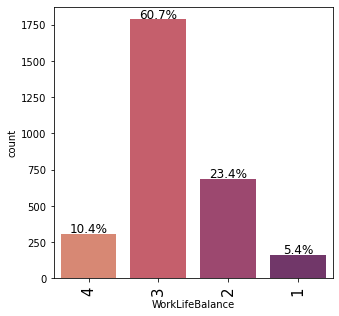

In [14]:
discrete_univariate_analysis(dataset, 'WorkLifeBalance', perc=True)

In [17]:
dataset.groupby(['Attrition', 'WorkLifeBalance'])['EmployeeNumber'].count()

Attrition  WorkLifeBalance
No         1                   110
           2                   572
           3                  1532
           4                   252
Yes        1                    50
           2                   116
           3                   254
           4                    54
Name: EmployeeNumber, dtype: int64

In [18]:
dataset.groupby(['Attrition', 'WorkLifeBalance']).agg({'EmployeeNumber':'count', 'MonthlyIncome':'mean'})

EmployeeNumber  MonthlyIncome
Attrition WorkLifeBalance                               
No        1                           110    6679.672727
          2                           572    6772.849650
          3                          1532    6782.622715
          4                           252    7340.174603
Yes       1                            50    4143.560000
          2                           116    4928.051724
          3                           254    5022.007874
          4                            54    3975.185185

## Observation
1. Majority of the employees rated 2-3 star for WLB 
2. More number of employees for those who are working rated 2-3 star in WLB 
3. 4 star rating is comparitively lesser for those left the organization 
5. Salary has no impact in work life balance 


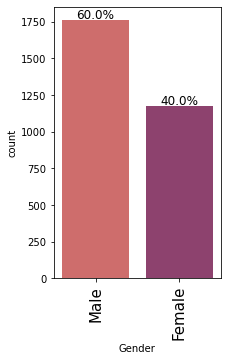

In [15]:
discrete_univariate_analysis(dataset, 'Gender', perc=True)

In [19]:
dataset.groupby(['Attrition', 'Gender']).agg({'EmployeeNumber':'count'})

EmployeeNumber
Attrition Gender                
No        Female            1002
          Male              1464
Yes       Female             174
          Male               300

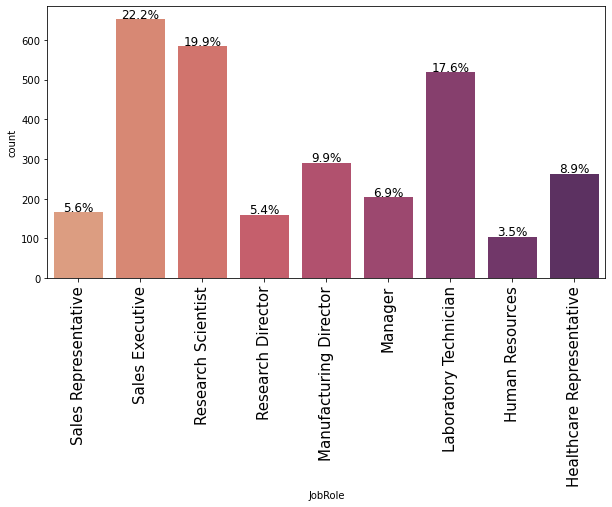

In [20]:
discrete_univariate_analysis(dataset, 'JobRole', perc=True)

In [23]:
explainer = dataset.groupby(['Attrition', 'JobRole'])['EmployeeNumber'].count().reset_index()

In [26]:
explainer

Attrition                    JobRole  EmployeeNumber
0         No  Healthcare Representative             244
1         No            Human Resources              80
2         No      Laboratory Technician             394
3         No                    Manager             194
4         No     Manufacturing Director             270
5         No          Research Director             156
6         No         Research Scientist             490
7         No            Sales Executive             538
8         No       Sales Representative             100
9        Yes  Healthcare Representative              18
10       Yes            Human Resources              24
11       Yes      Laboratory Technician             124
12       Yes                    Manager              10
13       Yes     Manufacturing Director              20
14       Yes          Research Director               4
15       Yes         Research Scientist              94
16       Yes            Sales Executive             114
17       Yes       Sales Representative              66

In [25]:
pd.pivot_table(explainer, index=['JobRole'], values = ['EmployeeNumber'], columns =['Attrition'] )

EmployeeNumber     
Attrition                             No  Yes
JobRole                                      
Healthcare Representative            244   18
Human Resources                       80   24
Laboratory Technician                394  124
Manager                              194   10
Manufacturing Director               270   20
Research Director                    156    4
Research Scientist                   490   94
Sales Executive                      538  114
Sales Representative                 100   66

## Observations:

1. Sales Representative/Executive, Lab Technicians, HR and research scientist are highest contributor of Attrition 
2. Minimal Attrition for leadership Team 


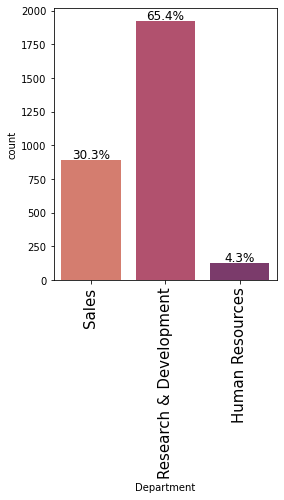

In [28]:
discrete_univariate_analysis(dataset, 
                            'Department', perc=True)

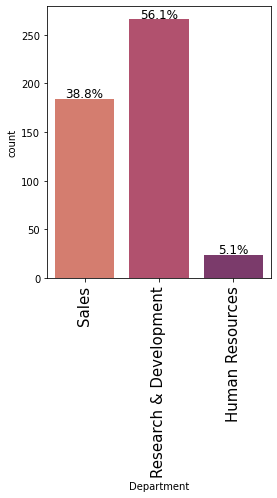

In [29]:
discrete_univariate_analysis(dataset[dataset['Attrition'] == 'Yes'], 
                            'Department', perc=True)

## Observation:
- More number of records will have more impact hence in Department we see for 2 categories more number of employees are present and more impact of attrition for those 2 categories.
- so technically Departments has no relation with attrition 

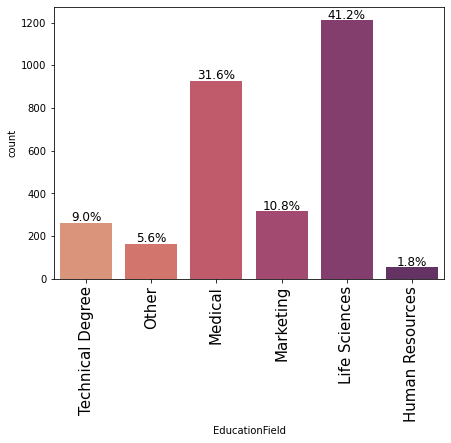

In [30]:
discrete_univariate_analysis(dataset, 'EducationField', perc=True)

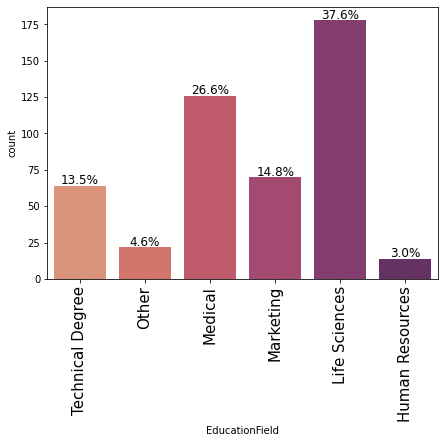

In [32]:
discrete_univariate_analysis(dataset[dataset['Attrition'] == 'Yes'], 'EducationField', perc=True)

## Observation:
1. Marketing and Technical degree as a part of Education field has more impact 
2. lifescience contains more number of employees hence it is ovios to have more attritation due to population majority effect 